# Quantum - Repetition Codes

How effective are they in reducing errors

In [1]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
backend = Aer.get_backend('qasm_simulator')

def get_noise(p_meas, p_gate):
    
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)
    
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements 
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x","h"]) # single qubit gate error is applied to x gates 
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates 
    
    return noise_model
    

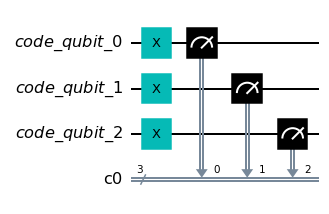

In [3]:
cq = QuantumRegister(3, 'code_qubit')
sb = ClassicalRegister(3)
qc = QuantumCircuit(cq, sb)
qc.x(cq[0])
qc.x(cq[1])
qc.x(cq[2])
qc.measure(cq,sb)
qc.draw('mpl')

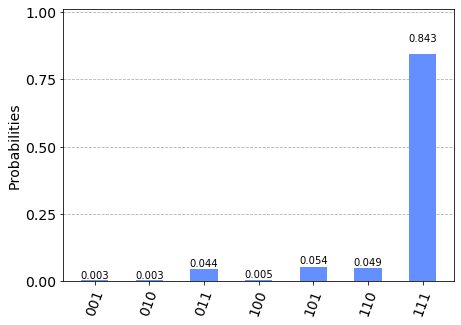

In [4]:
noise_model = get_noise(0.01, 0.1)
counts = execute(qc, backend, noise_model=noise_model).result().get_counts()
plot_histogram(counts)

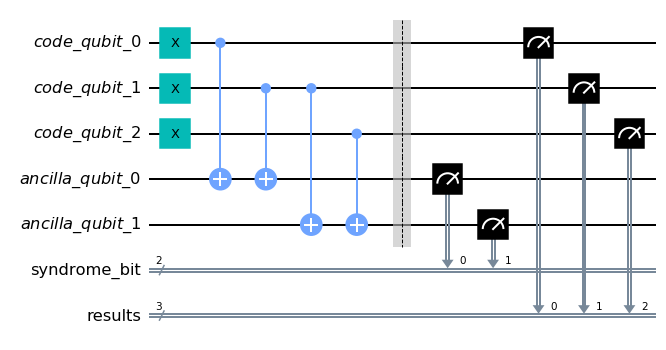

In [5]:
cq = QuantumRegister(3,'code_qubit')
lq = QuantumRegister(2,'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_bit')
rs = ClassicalRegister(3, 'results')
qc = QuantumCircuit(cq,lq,sb,rs)
qc.x(cq[0])
qc.x(cq[1])
qc.x(cq[2])
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.cx(cq[1],lq[1])
qc.cx(cq[2],lq[1])
qc.barrier()
qc.measure(lq,sb)
qc.measure(cq,rs)
qc.draw('mpl')

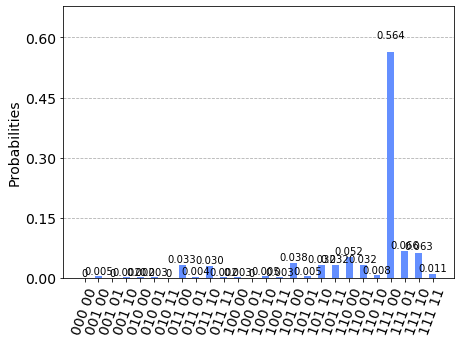

In [6]:
counts = execute(qc,backend,noise_model=noise_model).result().get_counts()
plot_histogram(counts)

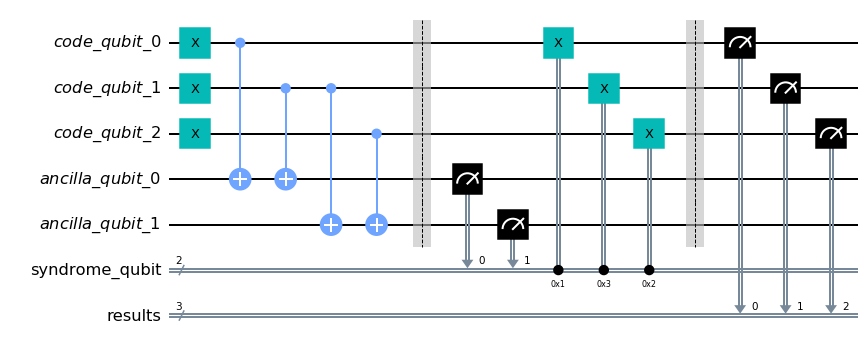

In [7]:
cq = QuantumRegister(3, 'code_qubit')
lq = QuantumRegister(2, 'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_qubit')
rs = ClassicalRegister(3, 'results')
qc = QuantumCircuit(cq,lq,sb,rs)
qc.x(cq[0])
qc.x(cq[1])
qc.x(cq[2])
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.cx(cq[1],lq[1])
qc.cx(cq[2],lq[1])
qc.barrier()
qc.measure(lq,sb)
qc.x(cq[0]).c_if(sb,1)
qc.x(cq[1]).c_if(sb,3)
qc.x(cq[2]).c_if(sb,2)
qc.barrier()
qc.measure(cq,rs)
qc.draw('mpl')

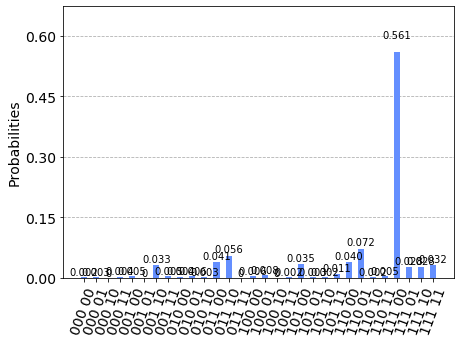

In [8]:
counts = execute(qc,backend,noise_model=noise_model).result().get_counts()
plot_histogram(counts)

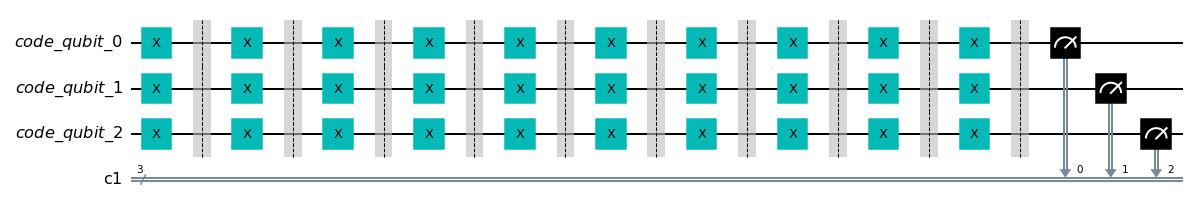

In [9]:
cq = QuantumRegister(3,'code_qubit')
sb = ClassicalRegister(3)
qc = QuantumCircuit(cq,sb)
N=10
for i in range(N):
    qc.x(cq[0])
    qc.x(cq[1])
    qc.x(cq[2])
    qc.barrier()
qc.measure(cq,sb)
qc.draw('mpl')

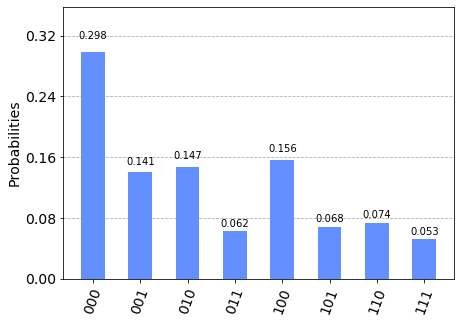

In [10]:
noise_model = get_noise(0.01,0.1)
counts = execute(qc,backend,noise_model=noise_model).result().get_counts()
plot_histogram(counts)

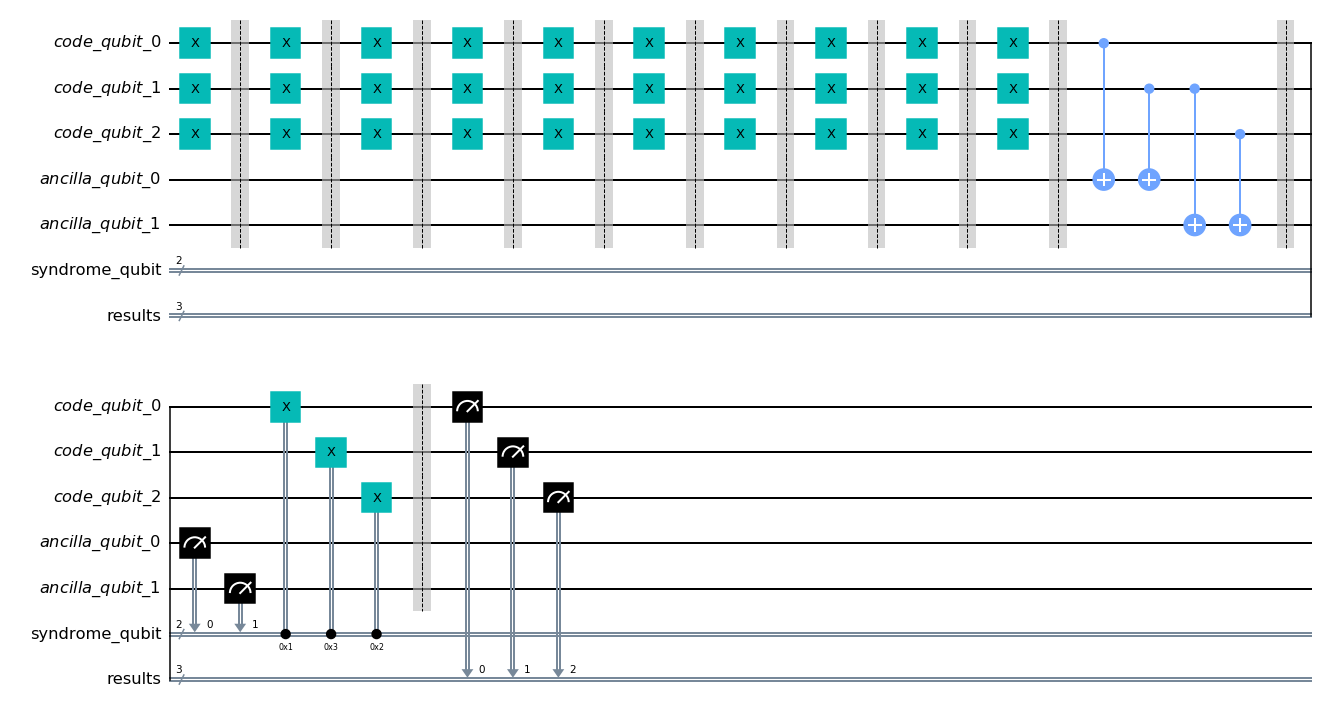

In [11]:
cq = QuantumRegister(3, 'code_qubit')
lq = QuantumRegister(2, 'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_qubit')
rs = ClassicalRegister(3, 'results')
qc = QuantumCircuit(cq,lq,sb,rs)
N=10
for i in range(N):
    qc.x(cq[0])
    qc.x(cq[1])
    qc.x(cq[2])
    qc.barrier()
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.cx(cq[1],lq[1])
qc.cx(cq[2],lq[1])
qc.barrier()
qc.measure(lq,sb)
qc.x(cq[0]).c_if(sb,1)
qc.x(cq[1]).c_if(sb,3)
qc.x(cq[2]).c_if(sb,2)
qc.barrier()
qc.measure(cq,rs)
qc.draw('mpl')

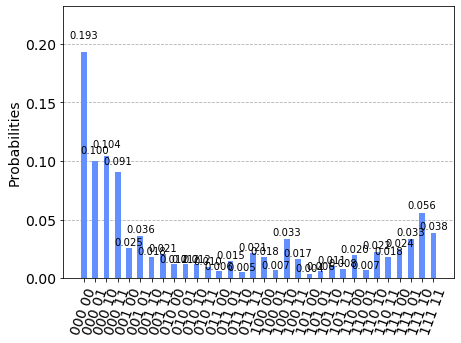

In [12]:
noise_model = get_noise(0.01,0.1)
counts = execute(qc,backend,noise_model=noise_model).result().get_counts()
plot_histogram(counts)

## Laboratory Activity

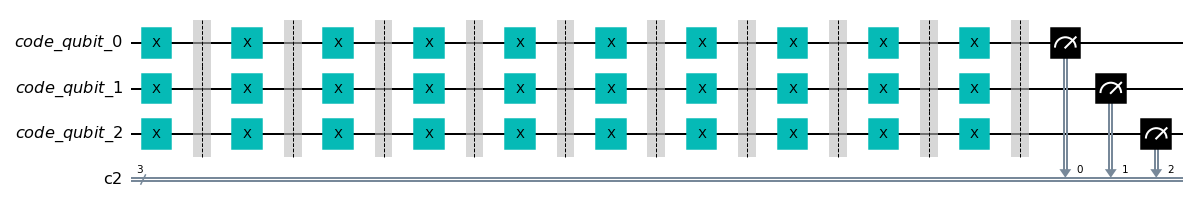

In [13]:
cq = QuantumRegister(3,'code_qubit')
sb = ClassicalRegister(3)
qc = QuantumCircuit(cq,sb)
N=10
for i in range(N):
    qc.x(cq[0])
    qc.x(cq[1])
    qc.x(cq[2])
    qc.barrier()
qc.measure(cq,sb)
qc.draw('mpl')

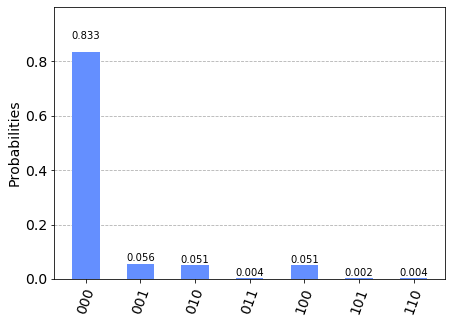

In [14]:
noise_model = get_noise(0.01,0.01)
counts = execute(qc,backend,noise_model=noise_model).result().get_counts()
plot_histogram(counts)

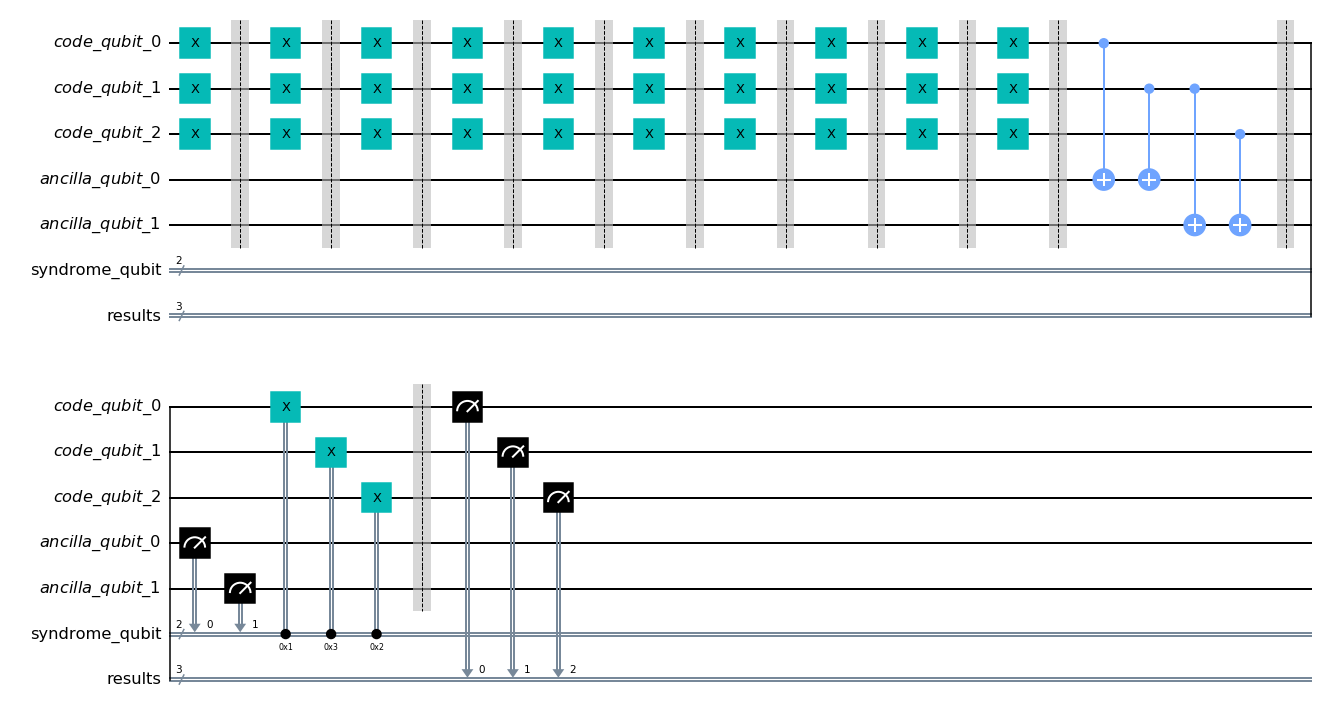

In [15]:
cq = QuantumRegister(3, 'code_qubit')
lq = QuantumRegister(2, 'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_qubit')
rs = ClassicalRegister(3, 'results')
qc = QuantumCircuit(cq,lq,sb,rs)
N=10
for i in range(N):
    qc.x(cq[0])
    qc.x(cq[1])
    qc.x(cq[2])
    qc.barrier()
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.cx(cq[1],lq[1])
qc.cx(cq[2],lq[1])
qc.barrier()
qc.measure(lq,sb)
qc.x(cq[0]).c_if(sb,1)
qc.x(cq[1]).c_if(sb,3)
qc.x(cq[2]).c_if(sb,2)
qc.barrier()
qc.measure(cq,rs)
qc.draw('mpl')

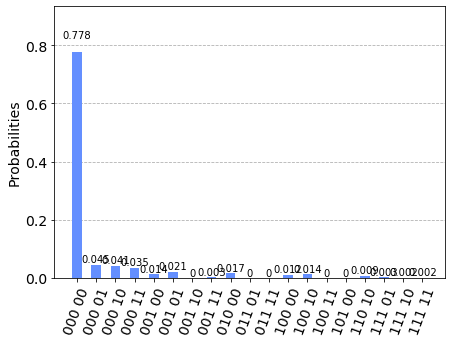

In [16]:
noise_model = get_noise(0.01,0.01)
counts = execute(qc,backend,noise_model=noise_model).result().get_counts()
plot_histogram(counts)